# Jobs Data Salaries Analysis 2020 - 2024

# 1. Tujuan Analisis
Melalui analisis berikut, saya akan menjawab pertanyaan-pertanyaan berikut:


1.   Bagaimana distribusi gaji dalam pekerjaan data sejak tahun 2020? Dan untuk setiap tahun?
2.   Apa saja pekerjaan yang paling banyak dibayar? Dan yang paling populer? Berapa gaji mereka?

1.    Apakah ada perubahan gaji dari waktu ke waktu dalam pekerjaan yang berbeda?
2.   Apakah terdapat perbedaan gaji berdasarkan ukuran perusahaan, jenis pekerjaan, rasio remote, dan tingkat pengalaman?

1.   Di negara mana gaji tertinggi?








# 2. Import Library

In [ ]:
!pip install pycountry

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pycountry

# 3. Import Dataset

In [ ]:
df = pd.read_csv("salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Research Scientist,300200,USD,300200,US,0,US,M
1,2024,SE,FT,Research Scientist,170700,USD,170700,US,0,US,M
2,2024,SE,FT,Data Scientist,251600,USD,251600,US,0,US,M
3,2024,SE,FT,Data Scientist,120100,USD,120100,US,0,US,M
4,2024,MI,FT,Data Engineer,120470,USD,120470,US,0,US,M


Dataset ini berisi 11 kolom dengan karakteristik sebagai berikut:



*   work_year: Tahun pembayaran gaji.
*   experience_level: Tingkat pengalaman dalam pekerjaan selama tahun tersebut dengan nilai-nilai berikut:

  *   EN: Entry-level / Junior
  *   MI: Mid-level / Intermediate
  *   SE: Senior-level / Expert
  *   EX: Executive-level / Director

*   employment_type: Jenis pekerjaan untuk peran tersebut:

  *   PT: Part-time
  *   FT: Full-time
  *   CT: Contract
  *   FL: Freelance

*   job_title: Peran yang dijalani selama tahun tersebut.


*   salary: Jumlah total gaji bruto yang dibayarkan.
*   salary_currency: Mata uang gaji yang dibayarkan dalam kode mata uang ISO 4217.


*   salary_in_usd: Gaji dalam USD (nilai tukar dibagi dengan rata-rata nilai tukar USD pada tahun tersebut melalui data dari fxdata.foorilla.com).
*   employee_residence: Negara tempat tinggal utama karyawan selama tahun kerja dalam kode negara ISO 3166.


*   remote_ratio: Jumlah keseluruhan pekerjaan yang dilakukan secara remote, dengan nilai-nilai berikut:

  *   0: Tidak ada pekerjaan remote
  *   50: Sebagian remote/hybrid
  *   100: Sepenuhnya remote

*   company_location: Negara kantor utama atau cabang kontraktor dari pemberi kerja dalam kode negara ISO 3166

*   company_size: Rata-rata jumlah orang yang bekerja untuk perusahaan selama tahun tersebut:

  *   S: kurang dari 50 karyawan (kecil)
  *   M: 50 hingga 250 karyawan (sedang)
  *   L: lebih dari 250 karyawan (besar)

In [ ]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26043 entries, 0 to 26042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           26043 non-null  int64 
 1   experience_level    26043 non-null  object
 2   employment_type     26043 non-null  object
 3   job_title           26043 non-null  object
 4   salary              26043 non-null  int64 
 5   salary_currency     26043 non-null  object
 6   salary_in_usd       26043 non-null  int64 
 7   employee_residence  26043 non-null  object
 8   remote_ratio        26043 non-null  int64 
 9   company_location    26043 non-null  object
 10  company_size        26043 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.2+ MB


In [ ]:
# Melihat sebaran statistik pada dataset

df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,26043.000000,2.604300e+04,26043.000000,26043.000000
mean,2023.508889,1.621397e+05,153136.368352,26.876704
std,0.679686,2.747089e+05,68751.761855,44.055748
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.050000e+05,105000.000000,0.000000
50%,2024.000000,1.450000e+05,145000.000000,0.000000
75%,2024.000000,1.935730e+05,192450.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.describe(include=['object'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,26043,26043,26043,26043,26043,26043,26043
unique,4,4,181,24,90,79,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,16134,25948,5890,24506,23306,23357,24580


# 4. Data Preprocessing

## 4.1 Drop dan merubah tipe data

Pertama-tama, kita memiliki 2 kolom yang tidak diperlukan, yaitu "salary" dan "salary_currency" karena kita sudah memiliki kolom "salary_in_usd". Jadi, kedua kolom ini akan dihapus. Selain itu, kolom "work_year" dan "remote_ratio" harus berupa tipe faktor dan bukan numerik.

In [ ]:
# Memilih kolom yang diperlukan
df = df.iloc[:, [0, 1, 2, 3, 6, 8, 9, 10]].copy() # menghilangkan kolom 'salary' dan 'salary_currency'

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2024,SE,FT,Research Scientist,300200,0,US,M
1,2024,SE,FT,Research Scientist,170700,0,US,M
2,2024,SE,FT,Data Scientist,251600,0,US,M
3,2024,SE,FT,Data Scientist,120100,0,US,M
4,2024,MI,FT,Data Engineer,120470,0,US,M


In [ ]:
# Mengubah kolom 'work_year' menjadi tipe kategori
df['work_year'] = df['work_year'].astype('category')

In [ ]:
# Mengubah kolom 'remote_ratio' menjadi tipe kategori
df['remote_ratio'] = df['remote_ratio'].astype('category')

## 4.2 Grop job tittle

In [ ]:
# Mendapatkan nilai unik dari kolom 'job_title'
unique_job_titles = df['job_title'].unique()

# Menghitung jumlah nilai unik dalam kolom 'job_title'
num_unique_job_titles = len(unique_job_titles)

# Menampilkan nilai unik dan jumlahnya
unique_job_titles, num_unique_job_titles

(array(['Research Scientist', 'Data Scientist', 'Data Engineer',
        'Data Analyst', 'Data Architect', 'Software Engineer',
        'AI Specialist', 'AI Engineer', 'Machine Learning Engineer',
        'Backend Engineer', 'Data Lead', 'Analytics Engineer',
        'Data Quality Manager', 'Research Analyst', 'Software Developer',
        'Machine Learning Scientist', 'Data Manager',
        'Business Intelligence Analyst',
        'Machine Learning Platform Engineer', 'Solutions Architect',
        'Site Reliability Engineer', 'Data Analytics Manager',
        'Principal Statistical Programmer', 'DevOps Engineer',
        'Business Intelligence Developer', 'Data Management Analyst',
        'Research Engineer', 'Applied Scientist',
        'Data Governance Specialist', 'Statistical Programmer',
        'Data Specialist', 'Head of AI', 'Data Management Manager',
        'Data Governance Engineer', 'Engineering Manager',
        'Business Intelligence Engineer', 'Data Management Specia

Kita dapat melihat bahwa terdapat lebih dari 100 nilai unik pekerjaan yang berbeda dan banyak di antaranya sangat mirip atau dapat dikelompokkan untuk analisis yang lebih baik. Misalnya: "Data Analyst", "Data Analytics Lead", "Lead Data Analyst", "Data Quality Analyst" dan sebagainya, semuanya dapat dikelompokkan dalam "Data Analyst".

Jadi, saya akan mengelompokkan pekerjaan dalam kategori yang berbeda dengan aturan berikut:

*   Jika job_title memiliki kata "Data" dan "Analyst" atau "Analytics" maka akan menjadi "Data Analyst"

*   Jika job_title memiliki kata "Data" dan "Scientist" atau "Science" maka akan menjadi "Data Scientist"

*   Jika job_title memiliki kata "Data" dan "Engineer" maka akan menjadi "Data Engineer"

*   Jika job_title memiliki kata "Data" dan "Architect" maka akan menjadi "Data Architect"

*   Jika job_title memiliki kata "Machine" dan "Learning" atau "ML" atau "MLOps" maka akan menjadi "Machine Learning"

*   Jika job_title memiliki kata "AI" maka akan menjadi "AI"

*   Jika job_title memiliki kata "Business" dan "Intelligence" atau "BI" maka akan menjadi "Business Intelligence"
*   Sisanya akan diklasifikasikan sebagai lainnya (others)

Ada beberapa kasus di mana judul pekerjaan berlaku untuk dua kategori sekaligus, tetapi akan diselesaikan dengan cara berikut:

*   "Data Analytics Engineer" akan diklasifikasikan sebagai "Data Analyst"

*   "Business Intelligence Data Analyst" dan "BI Data Analyst" akan diklasifikasikan sebagai "Data Analyst"
*   "Data Science Engineer" akan diklasifikasikan sebagai "Data Scientist"

In [ ]:
def replace_job(job_title, pattern_dict):
    for pattern_title, patterns in pattern_dict.items():
        if isinstance(patterns, list):
            for pattern in patterns:
                if re.search(pattern, job_title, re.IGNORECASE):
                    return pattern_title
        else:
            if re.search(patterns, job_title, re.IGNORECASE):
                return pattern_title
    return "Other"

# Definisikan daftar pola untuk dicari dan judul pekerjaan yang sesuai
pattern_dict = {
    "Data Analyst": ["Data.*Analyst", "Data.*Analytics"],
    "Data Scientist": ["Data.*Scientist", "Data.*Science"],
    "Data Engineer": "Data.*Engineer",
    "Data Architect": "Data.*Architect",
    "Machine Learning": ["Machine.*Learning", "ML.*"],
    "AI": "AI",
    "Business Intelligence": ["Business.*Intelligence", "BI.*"]
}

In [ ]:
# Membuat kolom baru dengan kategori, sehingga kolom asli tetap terjaga jika dibutuhkan
df['jobs_group'] = df['job_title'].apply(lambda x: replace_job(x, pattern_dict))

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,jobs_group
0,2024,SE,FT,Research Scientist,300200,0,US,M,Other
1,2024,SE,FT,Research Scientist,170700,0,US,M,Other
2,2024,SE,FT,Data Scientist,251600,0,US,M,Data Scientist
3,2024,SE,FT,Data Scientist,120100,0,US,M,Data Scientist
4,2024,MI,FT,Data Engineer,120470,0,US,M,Data Engineer


In [ ]:
df['jobs_group'].unique()

array(['Other', 'Data Scientist', 'Data Engineer', 'Data Analyst',
       'Data Architect', 'AI', 'Machine Learning',
       'Business Intelligence'], dtype=object)

## 4.3 Mengubah penamaan pada company location


Saya juga ingin mengubah kode dua huruf negara menjadi nama lengkap negara.

In [ ]:
# Fungsi untuk mengubah kode negara menjadi nama lengkap negara
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

# Mengubah kode negara di kolom 'company_location' menjadi nama lengkap negara
df['company_location'] = df['company_location'].apply(get_country_name)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,jobs_group
0,2024,SE,FT,Research Scientist,300200,0,United States,M,Other
1,2024,SE,FT,Research Scientist,170700,0,United States,M,Other
2,2024,SE,FT,Data Scientist,251600,0,United States,M,Data Scientist
3,2024,SE,FT,Data Scientist,120100,0,United States,M,Data Scientist
4,2024,MI,FT,Data Engineer,120470,0,United States,M,Data Engineer


# 5. Exploratory Data Analysis

## 5.1 Bagaimana distribusi gaji dalam pekerjaan data sejak tahun 2020? Dan untuk setiap tahun?


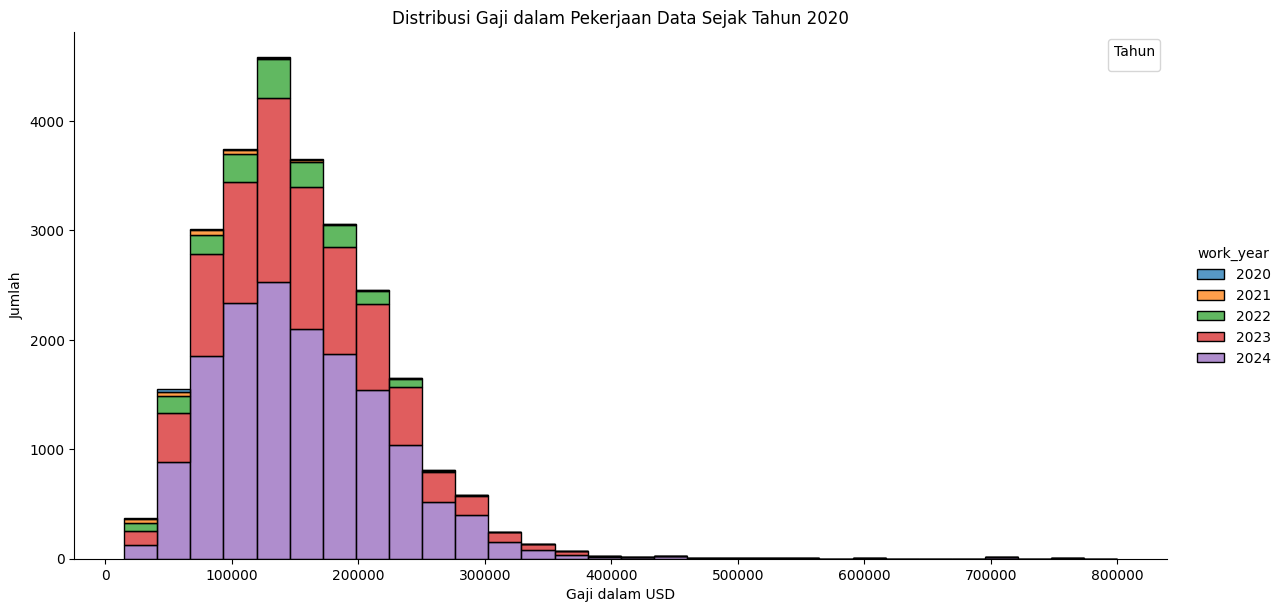

In [ ]:
# Plot distribusi gaji sejak tahun 2020 dengan displot
sns.displot(data=df, x='salary_in_usd', hue='work_year', kind='hist', multiple='stack', height=6, aspect=2, bins=30)
plt.title('Distribusi Gaji dalam Pekerjaan Data Sejak Tahun 2020')
plt.xlabel('Gaji dalam USD')
plt.ylabel('Jumlah')
plt.legend(title='Tahun')
plt.show()

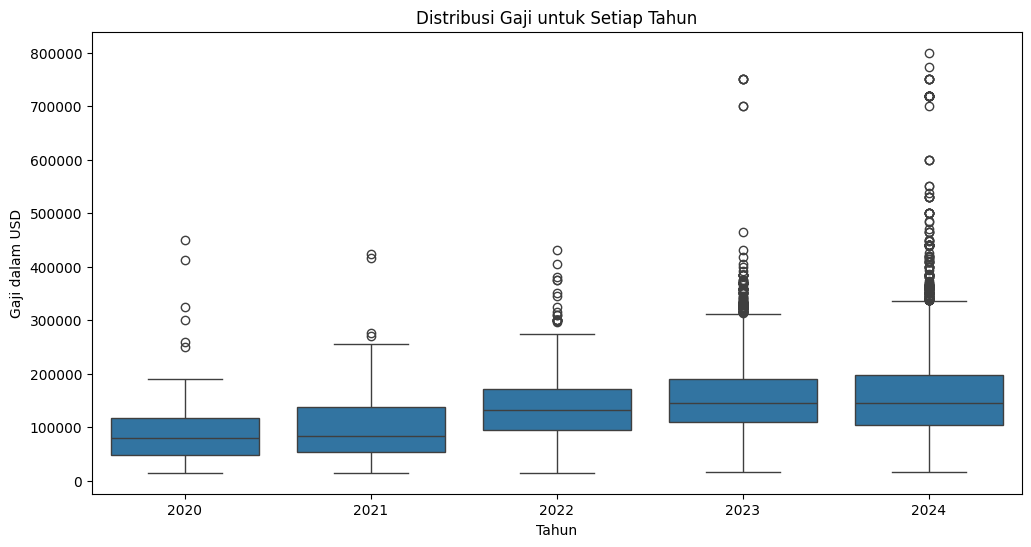

In [ ]:
# Plot distribusi gaji untuk setiap tahun
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='work_year', y='salary_in_usd')
plt.title('Distribusi Gaji untuk Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Gaji dalam USD')
plt.show()

<ipython-input-20-36ecff9ec6c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=amount, x='work_year', y='n', palette='Purples')


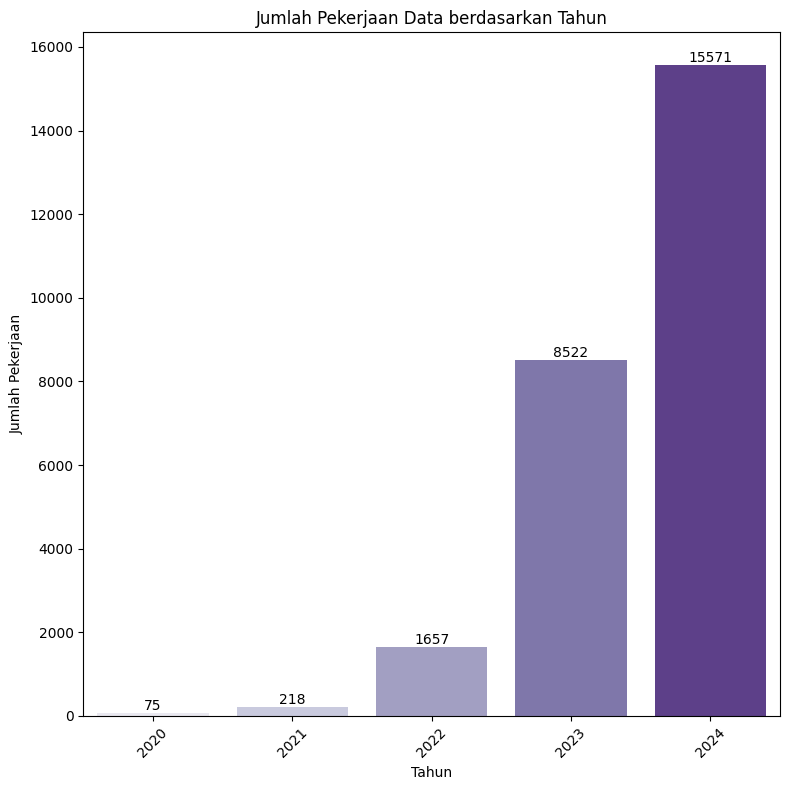

In [ ]:
# Menghitung jumlah pekerjaan data per tahun
amount = df.groupby('work_year').size().reset_index(name='n')

# Plot jumlah pekerjaan data per tahun
plt.figure(figsize=(8, 8))
sns.barplot(data=amount, x='work_year', y='n', palette='Purples')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pekerjaan')
plt.title('Jumlah Pekerjaan Data berdasarkan Tahun')
plt.xticks(rotation=45)
plt.tight_layout()

# Menambahkan label angka di atas bar
for index, row in amount.iterrows():
    plt.text(row.name, row.n + 0.2, row.n, ha='center', va='bottom')

plt.show()



*   Dari visualisasi sebelumnya yang pertama, terlihat bahwa sebagian besar gaji dalam pekerjaan data sejak tahun 2020 berada di sekitar 150K USD, dengan kisaran yang luas dari sekitar 15K USD hingga 800K USD.

*   Selain itu, dari grafik yang kedua, terlihat tren peningkatan median gaji dari tahun ke tahun. Pada tahun 2020, median gaji sekitar 80K USD, sementara saat ini telah meningkat menjadi sekitar 150K USD. Artinya, terjadi peningkatan sebesar 87,5% dalam 3 tahun terakhir.


*   Dan untuk visualisasi ketiga, Ketika melihat jumlah pekerjaan berdasarkan tahun, dapat dilihat bahwa pada tahun 2020 hanya terdapat 75 pekerjaan dalam dataset ini. Pada tahun 2021, jumlahnya meningkat menjadi 218 pekerjaan, kemudian melonjak menjadi 1657 pekerjaan pada tahun 2022, dan saat ini tercatat lebih dari 15000 pekerjaan. Jumlah pekerjaan menunjukkan kecenderungan eksponensial dari tahun ke tahun. Peningkatan tahunan tertinggi terjadi pada periode 2022-2023 dengan kenaikan sebesar **414.20%**.









## 5.2 Apa saja pekerjaan yang paling banyak dibayar? Dan yang paling populer? Berapa gaji mereka?



<ipython-input-21-340073a599f7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_salaries, x='n', y='jobs_group', palette='Accent', ax=axes[0])
<ipython-input-21-340073a599f7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_salaries, x='avg_salary_thousands', y='jobs_group', palette='Accent', ax=axes[1])


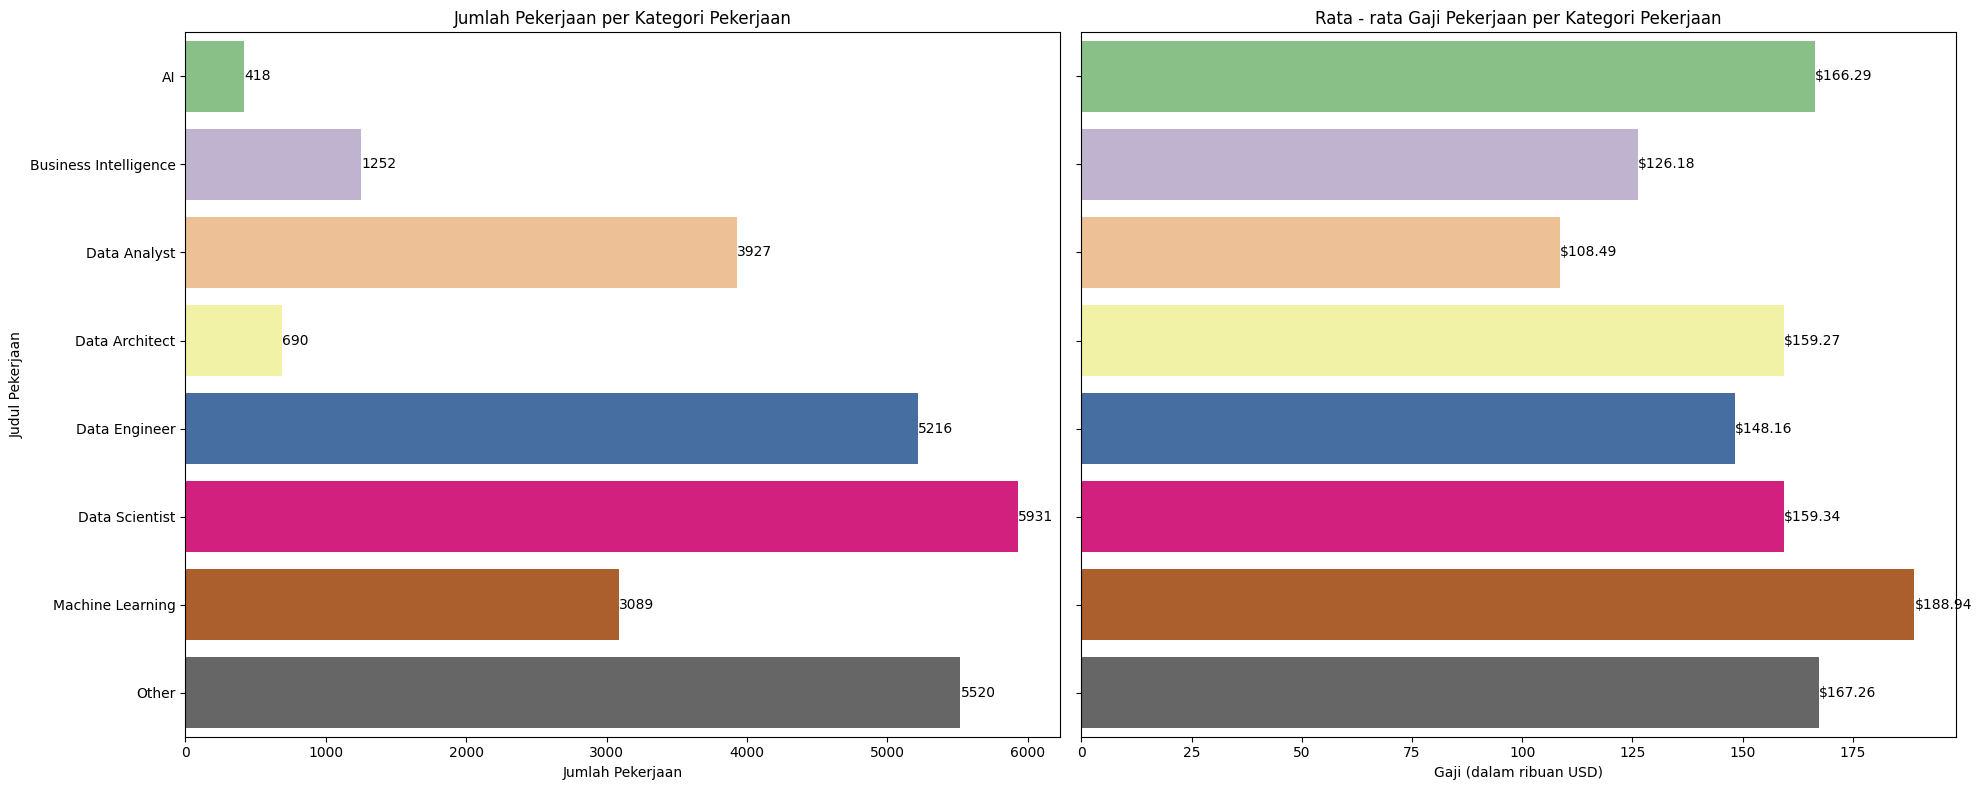

In [ ]:
# Menghitung gaji rata-rata dan jumlah pekerjaan per grup pekerjaan
job_salaries = df.groupby('jobs_group').agg(avg_salary=('salary_in_usd', 'mean'), n=('jobs_group', 'size')).reset_index()

# Membagi avg_salary dengan 1000 untuk keperluan plotting
job_salaries['avg_salary_thousands'] = job_salaries['avg_salary'] / 1000

# Membuat subplots
fig, axes = plt.subplots(ncols=2, figsize=(20, 8), sharey=True)

# Plot pertama untuk jumlah pekerjaan
sns.barplot(data=job_salaries, x='n', y='jobs_group', palette='Accent', ax=axes[0])
axes[0].set_xlabel("Jumlah Pekerjaan")
axes[0].set_ylabel("Judul Pekerjaan")
axes[0].set_title("Jumlah Pekerjaan per Kategori Pekerjaan")

# Menambahkan label jumlah pekerjaan
for index, row in job_salaries.iterrows():
    axes[0].text(row.n, index, row.n, va='center', ha='left', size=10)

# Plot kedua untuk gaji pekerjaan
sns.barplot(data=job_salaries, x='avg_salary_thousands', y='jobs_group', palette='Accent', ax=axes[1])
axes[1].set_xlabel("Gaji (dalam ribuan USD)")
axes[1].set_title("Rata - rata Gaji Pekerjaan per Kategori Pekerjaan")

# Menambahkan label gaji
for index, row in job_salaries.iterrows():
    axes[1].text(row.avg_salary_thousands, index, f"${row.avg_salary_thousands:,.2f}", va='center', ha='left', size=10)

plt.tight_layout()
plt.show()

Plot diatas menunjukkan popularitas setiap pekerjaan berdasarkan jumlah pekerjaan dan rata-rata gaji selama beberapa tahun untuk setiap peran. Dari plot ini, terlihat bahwa "Data Scientist" adalah pekerjaan yang paling banyak diminati dengan 5931 pekerjaan dalam dataset ini, diikuti oleh "Other" dan "Data Engineer". Akan tetapi, ketiga pekerjaan ini tidak memiliki gaji tertinggi; bahkan, peran "Data Analyst" memiliki gaji terendah di antara semua pekerjaan. Gaji tertinggi ditemukan dalam bidang "Machine Learning", "AI", dan "Other".

In [ ]:
# Menyaring grup pekerjaan "Other"
other = df[df['jobs_group'] == 'Other']

# Menghitung rata-rata gaji dan jumlah pekerjaan per judul pekerjaan dalam grup "Other"
other_jobs = other.groupby('job_title').agg(Rata_rata_Salary=('salary_in_usd', 'mean'), Jumlah_Pekerjaan=('job_title', 'size')).reset_index().sort_values(by='Rata_rata_Salary', ascending=False)

# Mencetak hasil
other_jobs.head()

,job_title,Rata_rata_Salary,Jumlah_Pekerjaan
1,Analytics Engineering Manager,399880.000000,1
46,Engineering Manager,318593.166667,24
47,Head of Data,215128.207792,77
53,Prompt Engineer,215083.736842,19
60,Robotics Software Engineer,198750.000000,12


## 5.3 Apakah ada perubahan gaji dari waktu ke waktu dalam pekerjaan yang berbeda?

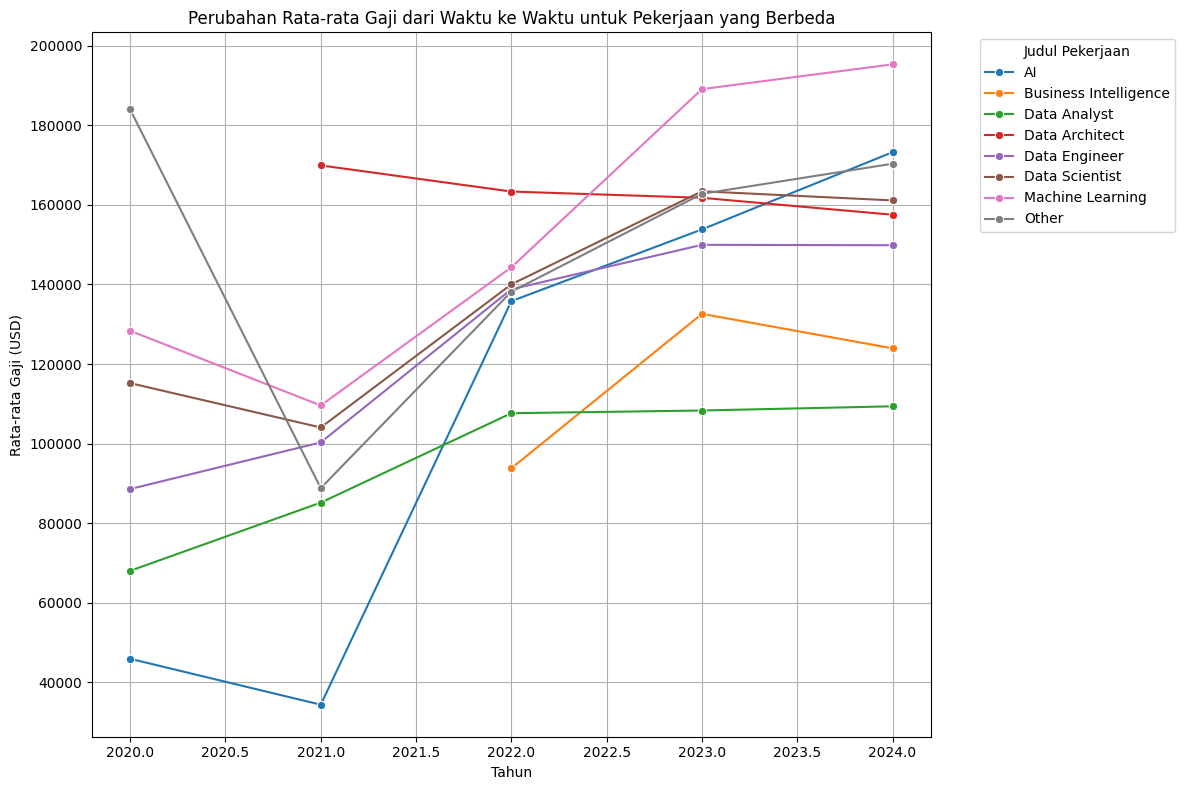

In [ ]:
# Menghitung rata-rata gaji per tahun dan per pekerjaan
salary_trends = df.groupby(['work_year', 'jobs_group']).agg(mean_salary=('salary_in_usd', 'mean')).reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=salary_trends, x='work_year', y='mean_salary', hue='jobs_group', marker='o')

# Menambahkan label dan judul
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Gaji (USD)")
plt.title("Perubahan Rata-rata Gaji dari Waktu ke Waktu untuk Pekerjaan yang Berbeda")
plt.legend(title="Judul Pekerjaan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()

Pada plot diatas, kita dapat melihat rata - rata gaji setiap pekerjaan dari tahun ke tahun. Kita dapat melihat bahwa hampir semua pekerjaan menunjukkan kecenderungan peningkatan yang jelas. Hanya ada dua area di mana kecenderungan ini tidak terlihat, yaitu "Data Architect".

## 5.4 Apakah terdapat perbedaan gaji berdasarkan ukuran perusahaan, jenis pekerjaan, rasio remote, dan tingkat pengalaman?

<ipython-input-25-d9b9abc469bf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_size_salary, x='company_size', y='salary_in_usd', palette='Set3')
<ipython-input-25-d9b9abc469bf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employment_type_salary, x='employment_type', y='salary_in_usd', palette='Set2')
<ipython-input-25-d9b9abc469bf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=remote_ratio_salary, x='remote_ratio', y='salary_in_usd', palette='Set1')
<ipython-input-25-d9b9abc469bf>:33: FutureWarning: 

Passi

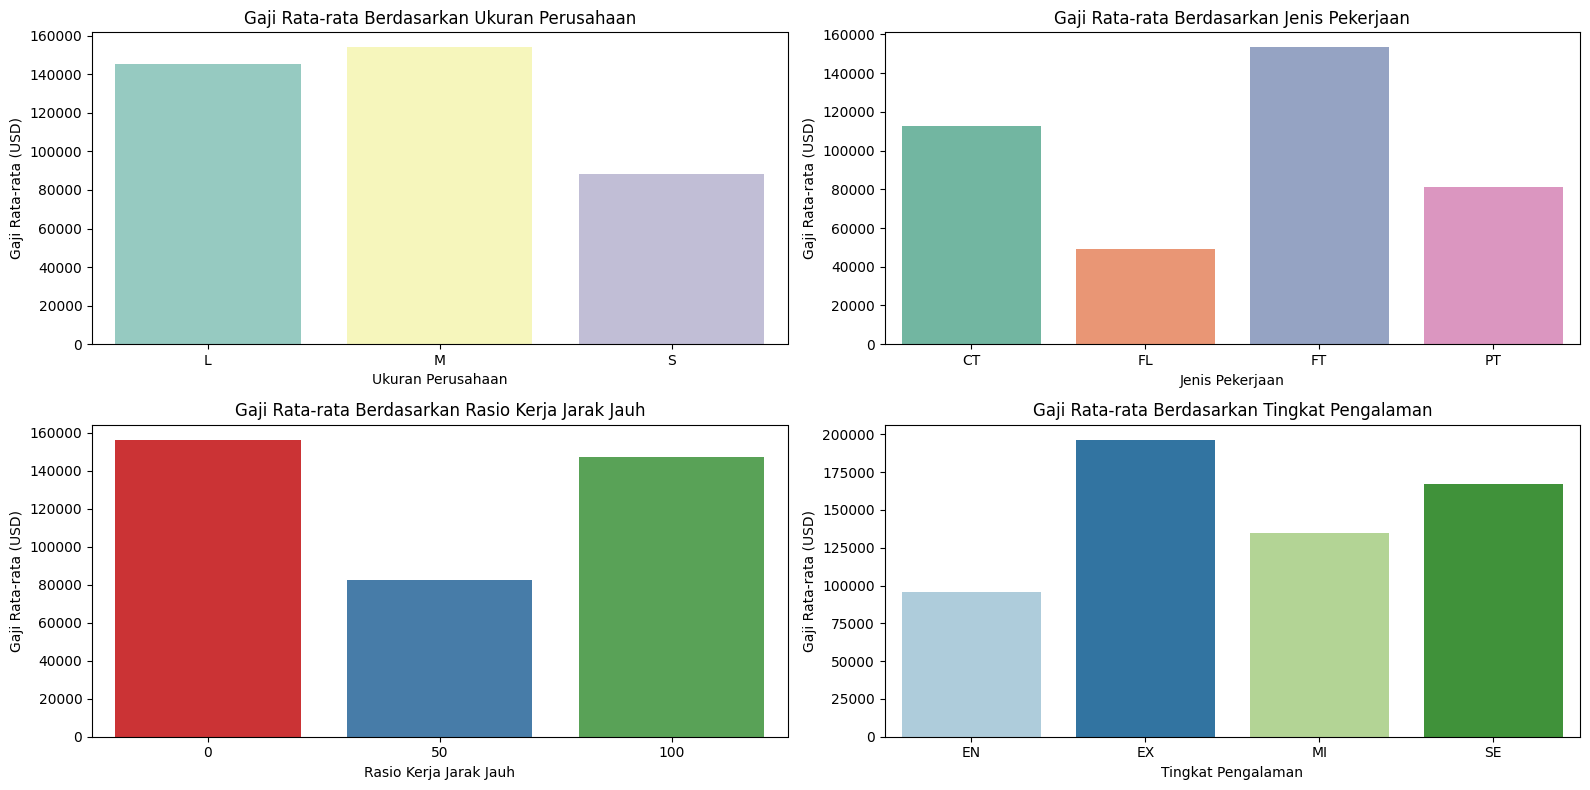

In [ ]:
# Menghitung rata-rata gaji berdasarkan ukuran perusahaan
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
employment_type_salary = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
remote_ratio_salary = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()
experience_level_salary = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Mengatur ukuran plot
plt.figure(figsize=(16, 8))

# Plot rata-rata gaji berdasarkan ukuran perusahaan
plt.subplot(2, 2, 1)
sns.barplot(data=company_size_salary, x='company_size', y='salary_in_usd', palette='Set3')
plt.xlabel('Ukuran Perusahaan')
plt.ylabel('Gaji Rata-rata (USD)')
plt.title('Gaji Rata-rata Berdasarkan Ukuran Perusahaan')

# Plot rata-rata gaji berdasarkan jenis pekerjaan
plt.subplot(2, 2, 2)
sns.barplot(data=employment_type_salary, x='employment_type', y='salary_in_usd', palette='Set2')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Gaji Rata-rata (USD)')
plt.title('Gaji Rata-rata Berdasarkan Jenis Pekerjaan')

# Plot rata-rata gaji berdasarkan rasio kerja jarak jauh
plt.subplot(2, 2, 3)
sns.barplot(data=remote_ratio_salary, x='remote_ratio', y='salary_in_usd', palette='Set1')
plt.xlabel('Rasio Kerja Jarak Jauh')
plt.ylabel('Gaji Rata-rata (USD)')
plt.title('Gaji Rata-rata Berdasarkan Rasio Kerja Jarak Jauh')

# Plot rata-rata gaji berdasarkan tingkat pengalaman
plt.subplot(2, 2, 4)
sns.barplot(data=experience_level_salary, x='experience_level', y='salary_in_usd', palette='Paired')
plt.xlabel('Tingkat Pengalaman')
plt.ylabel('Gaji Rata-rata (USD)')
plt.title('Gaji Rata-rata Berdasarkan Tingkat Pengalaman')

# Menampilkan plot
plt.tight_layout()
plt.show()



*   Plot pertama menunjukkan ukuran perusahaan, dan kita dapat melihat bahwa di perusahaan berukuran sedang (50 hingga 250 karyawan) memiliki rata - rata gaji tertinggi, diikuti oleh perusahaan berukuran besar dan terakhir perusahaan kecil.

*   Plot kedua memberikan informasi tentang jenis pekerjaan yangg dimana PT=Paruh waktu, FT=Penuh waktu, CT=Kontrak, dan FL=Freelance. Pada posisi penuh waktu, rata - rata gaji sekitar 150K USD, sedangkan pada posisi Freelance, rata - rata gajinya paling rendah sekitar 50K USD.

*   plot ketiga, kita dapat melihat bahwa pekerjaan yang sepenuhnya hadir di kantor atau sepenuhnya remote jauh lebih menguntungkan daripada yang sebagian remote/hybrid.

*   pada plot keempat kita dapat melihat bahwa pengalaman sangat berkorelasi dengan gaji. Seseorang yang berada pada level eksekutif (EX) memperoleh gaji yang jauh lebih tinggi dibandingkan dengan seseorang yang berada pada level pemula (EN).




## 5.5 Di negara mana gaji tertinggi?

In [ ]:
df['company_location'].unique()

array(['United States', 'Philippines', 'Canada', 'United Kingdom',
       'Australia', 'Italy', 'Ireland', 'Türkiye', 'Netherlands', 'Egypt',
       'Germany', 'Armenia', 'Brazil', 'Mexico', 'France', 'South Africa',
       'New Zealand', 'Slovakia', 'Poland', 'Lithuania', 'Portugal',
       'Chile', 'Argentina', 'India', 'Algeria', 'American Samoa',
       'Israel', 'Finland', 'Luxembourg', 'Kenya', 'Serbia', 'Greece',
       'Ukraine', 'Spain', 'Sweden', 'Denmark', 'Latvia', 'Austria',
       'Switzerland', 'United Arab Emirates', 'Saudi Arabia', 'Oman',
       'Bosnia and Herzegovina', 'Estonia', 'Malta', 'Hungary', 'Lebanon',
       'Romania', 'Viet Nam', 'Nigeria', 'Gibraltar', 'Colombia',
       'Slovenia', 'Mauritius', 'Russian Federation',
       'Korea, Republic of', 'Czechia', 'Qatar', 'Ghana', 'Andorra',
       'Ecuador', 'Norway', 'Japan', 'Hong Kong',
       'Central African Republic', 'Singapore', 'Thailand', 'Croatia',
       'Pakistan', 'Iran, Islamic Republic of', 'Bah

<ipython-input-39-1a700a43c9bd>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


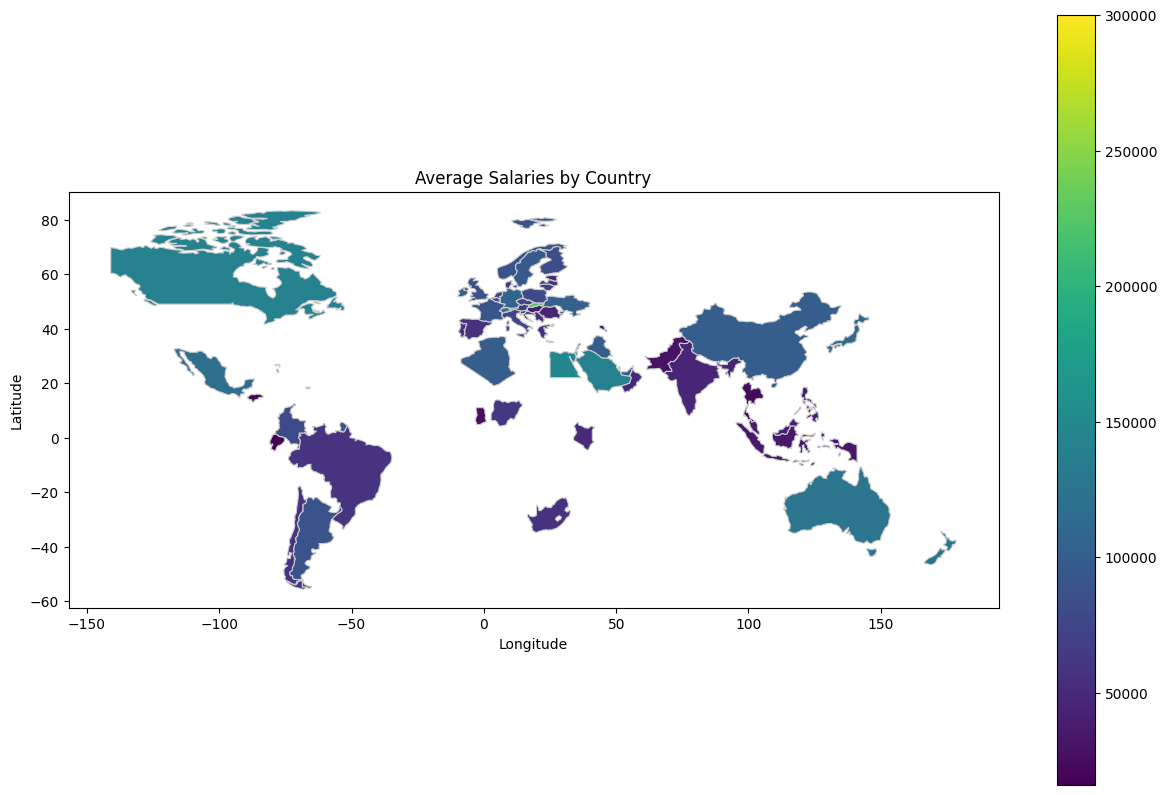

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
# Load world map shapefile menggunakan geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Menghitung rata-rata gaji berdasarkan negara
avg_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Merge dengan world shapefile berdasarkan nama negara
world = world.merge(avg_salary_by_country, left_on='name', right_on='company_location')

# Plotting peta
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='salary_in_usd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Average Salaries by Country')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Pada visualisasi diatas dapat dilihat bahwa gaji tertinggi di seluruh dunia terdapat di Amerika Utara dan Timur Tengah

# 6. Kesimpulan



1.   Seperti yang terlihat dari analisis, pekerjaan yang terkait dengan data mengalami peningkatan yang signifikan dalam beberapa tahun terakhir. Jumlah pekerjaan dalam bidang ini meningkat secara eksponensial, sementara gaji juga meningkat seiring waktu.

2.   "Data Engineer", "Data Scientist", dan "Others" adalah tiga pekerjaan paling populer dan Pekerjaan "Machine Learning " merupakan pekerjaan rata - rata bayaray tertinggi.

1.   Bagi seseorang yang ingin memiliki pekerjaan dengan gaji tertinggi, disarankan untuk mencari posisi yang sepenuhnya remote atau presensial, di perusahaan berukuran sedang atau besar, dengan jenis pekerjaan full time dan juga Idealnya, pekerjaan tersebut juga sebaiknya berada di Amerika Utara atau Timur Tengah.